In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\Anmol.Yadav\\Desktop\\data\\sundaram\\sundaram_stats_ml\\stats by sundaram\\16_28th Dec 2023(titanic normality)'

In [3]:
data = pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# First step is Data Preprocessing Method
# It is sub-divided into 5 parts:-
# 1.> Handling missing value
# 2.> Handling Char/Object variable
# 3.> Handling Outlier
# 4.> Feature Scaling or Scaling Data
# 5.> Imbalance Treatment

# 1.> Handling missing value

In [7]:
data.isnull().sum()/891 * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

<Axes: >

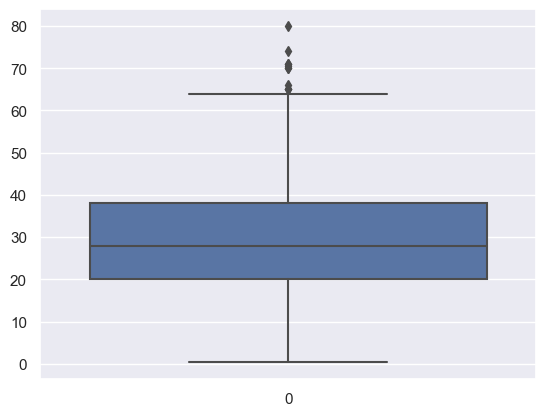

In [10]:
sns.boxplot(data['Age'])

In [11]:
# There are outlier thats why will go will median.
# If there were no outlier then will go with mean

In [12]:
dataset = data['Age'].fillna(data['Age'].median())

In [13]:
dataset.isnull().sum()

0

In [14]:
dataset.mean()

29.36158249158249

In [15]:
dataset.shape

(891,)

In [16]:
len(dataset)

891

In [17]:
dataset.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [18]:
# Here checking the Hypothesis Testing on the sample dataset of 25 value

In [19]:
# 

In [20]:
sample_dataset = dataset.sample(25).values
sample_dataset

array([28., 22., 28., 28., 25., 41., 20., 28., 28., 24.,  2., 52., 21.,
        9., 28., 45., 29., 40., 24., 42., 18., 24., 26., 18., 28.])

In [21]:
sample_mean = sample_dataset.mean()
sample_mean

27.12

In [22]:
# Question here to check normality and do check hypothesis test

In [23]:
# H0 : The person mean age is 35
# Ha : The person mean age is less than 35
# 25 sample data is normaly distribution or not : Shapiro Wilk Test
# if the value is more 0.05 then my data is normal distribution
from scipy.stats import shapiro

In [24]:
shapiro_age = shapiro(sample_dataset)
print(shapiro_age)

ShapiroResult(statistic=0.933348536491394, pvalue=0.10386457294225693)


In [25]:
# Since, pvalue is more than 0.05 hence, we can say that 25 sample data are also normal dist

In [26]:
pop_mean = 35

In [27]:
pop_mean

35

In [28]:
# Finding hypothesis testing
import scipy.stats as stats

In [30]:
# one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_dataset, pop_mean)
print("t_statistic", t_statistic)
print("p_value", p_value/2)
# p_value / 2: The division by 2 is used when performing a one-tailed test

t_statistic -3.646012763478334
p_value 0.0006409759214633182


In [31]:
p_value

0.0012819518429266364

In [32]:
alpha = 0.05

if p_value <= alpha:
    print("Reject Null Hypothesis and Accept Alternative Hypothesis")
else:
    print("Fail to reject null hypotheis")

Reject Null Hypothesis and Accept Alternative Hypothesis


In [34]:
# Conclusion:
# If your objective is to determine if 25 sample data points are normally distributed, use a normality test like Shapiro-Wilk.
# If the p-value from the normality test is more than 0.05, you cannot reject the hypothesis that the data is normally distributed."

"""Key Points:
Understanding p-value in the Context of a t-test:

1.) A p-value greater than 0.05 in a one-sample t-test indicates that the sample mean is not significantly different from the population mean. It does not provide any direct information about whether the data is normally distributed.
    Testing for Normality:

2.) If you want to test whether a sample of data is normally distributed, you should use a normality test, such as the Shapiro-Wilk test or the Kolmogorov-Smirnov test.
    A high p-value (> 0.05) in these normality tests would suggest that the data does not significantly deviate from normality, meaning it could be considered normally distributed.
    Why Normality Matters in t-tests:

3.) The one-sample t-test assumes that the data is approximately normally distributed, especially for small sample sizes (like 25). If this assumption is violated, the results of the t-test may not be reliable."""

"""In hypothesis testing, **significance** refers to the threshold at which you decide whether to reject or fail to reject the null hypothesis. This threshold is defined by a **significance level**, denoted by \(\alpha\), which represents the probability of making a **Type I error**—rejecting the null hypothesis when it is actually true.

### Key Concepts of Hypothesis Testing and Significance:

1. **Hypothesis Testing**:
   - **Null Hypothesis (H₀)**: A statement that there is no effect or no difference. It is the hypothesis that the test seeks to reject.
   - **Alternative Hypothesis (H₁)**: A statement that there is an effect or a difference. It represents what you are trying to prove.

2. **Significance Level (\(\alpha\))**:
   - The significance level is the probability of rejecting the null hypothesis when it is true (Type I error). Common significance levels are 0.05 (5%), 0.01 (1%), or 0.10 (10%).
   - For example, a significance level of \(\alpha = 0.05\) means there is a 5% risk of concluding that a difference exists when there is no actual difference.

3. **p-value**:
   - The p-value represents the probability of observing the data, or something more extreme, given that the null hypothesis is true.
   - If the **p-value** is **less than or equal to** the chosen significance level (\(\alpha\)), you **reject the null hypothesis**. This means there is sufficient evidence to support the alternative hypothesis.
   - If the **p-value** is **greater than** the significance level, you **fail to reject the null hypothesis**. This means there is not enough evidence to support the alternative hypothesis.

4. **Interpreting the Significance in Hypothesis Testing**:
   - **Reject H₀**: If the p-value is less than \(\alpha\), the result is statistically significant, indicating evidence against the null hypothesis in favor of the alternative hypothesis.
   - **Fail to Reject H₀**: If the p-value is greater than \(\alpha\), the result is not statistically significant, indicating insufficient evidence to reject the null hypothesis.

### Significance in Your Context:

When conducting hypothesis tests like the **one-sample t-test**, the **significance** level determines whether the difference between the sample mean and the population mean is statistically significant or could have occurred by random chance.

For example, suppose you conducted a one-sample t-test with the following:

- **Null Hypothesis (H₀)**: The sample mean is equal to the population mean (\(\mu = \mu_0\)).
- **Alternative Hypothesis (H₁)**: The sample mean is different from the population mean (\(\mu \neq \mu_0\)).

If you choose a significance level of 0.05 and the resulting p-value is 0.03:

- Since **0.03 < 0.05**, you would **reject the null hypothesis** and conclude that there is a statistically significant difference between the sample mean and the population mean.
- Conversely, if the p-value were 0.08, since **0.08 > 0.05**, you would **fail to reject the null hypothesis**, indicating that the observed difference is not statistically significant and could be due to random chance.

### Summary:

- **Significance** in hypothesis testing determines whether to reject or fail to reject the null hypothesis based on a predetermined significance level (\(\alpha\)).
- The **p-value** is compared against \(\alpha\) to make this decision.
- If the p-value is **less than \(\alpha\)**, the result is **statistically significant**, and you reject the null hypothesis.
- If the p-value is **greater than \(\alpha\)**, the result is **not statistically significant**, and you fail to reject the null hypothesis.

Would you like more examples of hypothesis testing or explanations on related topics?"""